In [1]:
import numpy as np
import matplotlib.pyplot as plt

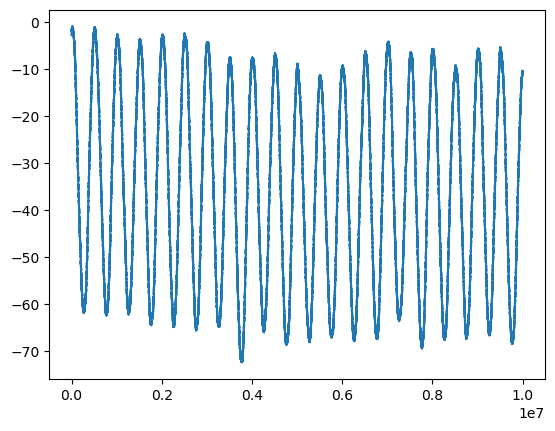

In [30]:
pha=np.load('./50km/phase_data/f=1000hz.npy')
plt.plot(pha[0])

In [29]:
pha=pha[:,:100000]

In [21]:
from tqdm import tqdm
SR=500E6
a=pha[0]
v=pha[1]

dt=np.arange(-a.size+1,v.size)/SR
res=np.zeros_like(dt)
#---- C:mean
am0=np.zeros(a.size+2*v.size-2)
am0[v.size:v.size+a.size]=a
for i in tqdm(range(dt.shape[0])):
    av=am0[i:i+v.size]-v
    av=av[av!=0]
    res[i]=np.sum((av-np.mean(av))**2)
    


100%|██████████| 19999/19999 [00:00<00:00, 29060.24it/s]


In [27]:
import numba
from numba import jit

@jit(nopython=True)
def demo(ch1,ch2):
    a=ch1
    v=ch2
    dt=np.arange(-a.size+1,v.size)/SR
    res=np.zeros_like(dt)
    #---- C:mean
    am0=np.zeros(a.size+2*v.size-2)
    am0[v.size:v.size+a.size]=a
    for i in (range(dt.shape[0])):
        av=am0[i:i+v.size]-v
        #av=av[av!=0]
        res[i]=np.sum((av-np.mean(av))**2)
    return res

In [ ]:
demo(pha[0],pha[1])